In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('sweet_potato.csv')

df.head()

,Date,price
0,2016-01/05,24229
1,2016-01/12,24795
2,2016-01/19,23201
3,2016-01/26,24247
4,2016-02/02,22088


In [3]:
df.describe()

,price
count,306.000000
mean,29122.767974
std,9295.894364
min,14777.000000
25%,22504.750000
50%,25613.000000
75%,33731.500000
max,65929.000000


In [4]:
df = df.rename(columns={'Date' : 'ds', 'price' : 'y'})
df.head

<bound method NDFrame.head of              ds      y
0    2016-01/05  24229
1    2016-01/12  24795
2    2016-01/19  23201
3    2016-01/26  24247
4    2016-02/02  22088
..          ...    ...
301  2022-08/12  23299
302  2022-08/19  22793
303  2022-08/26  23333
304  2022-09/02  22373
305  2022-09/16  24579

[306 rows x 2 columns]>

<AxesSubplot:xlabel='ds'>

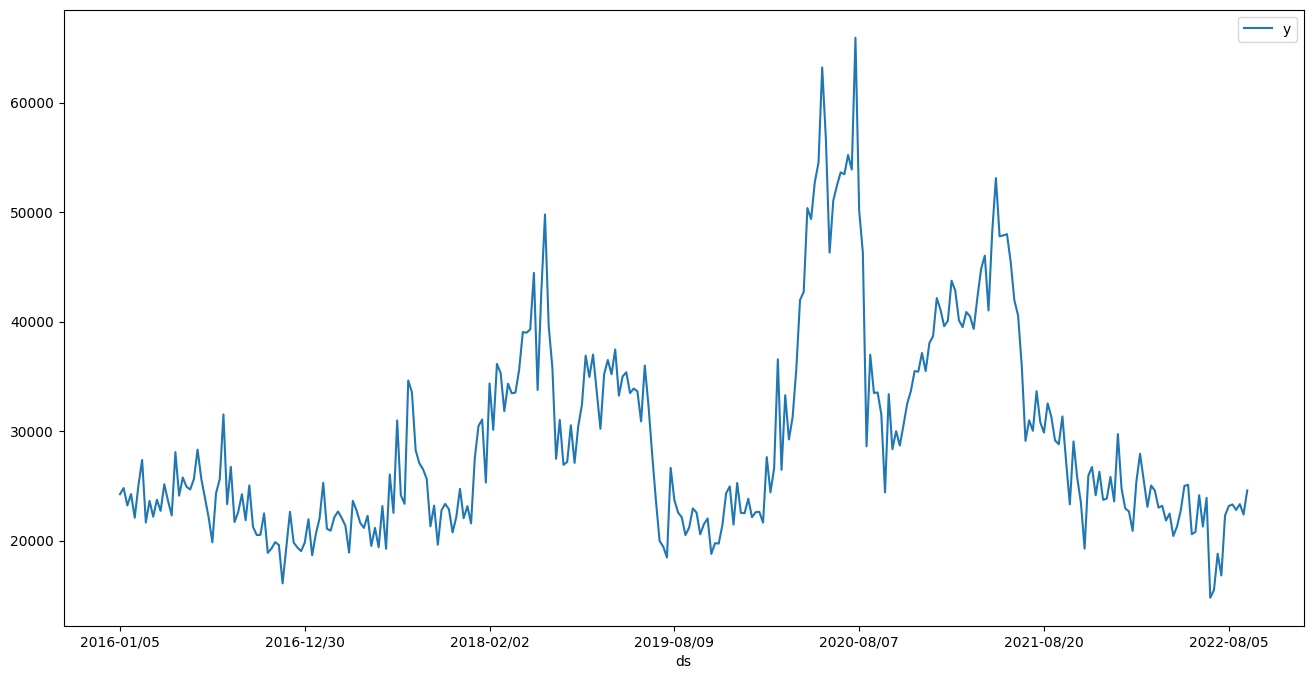

In [5]:
df.plot(x='ds', y='y', figsize=(16,8))

In [6]:
model = Prophet()

model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.79871
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73       543.186   0.000912983       88.2797   6.054e-06       0.001      132  LS failed, Hessian reset 
      99        543.91   2.57345e-05       72.7074           1           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       544.212   0.000258934       69.3978     3.5e-06       0.001      259  LS failed, Hessian reset 
     199       544.345   9.72351e-05       81.0732           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       544.364   0.000111881       80.8697   1.362e-06       0.001      385  LS failed, Hessian reset 
     229       544.392   6.48601e-05       66.6641   9.841e-07       0.001      447  LS failed, Hessian reset 
     299        544.41   6.13062e-05       86.9167           1   

/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [7]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast.tail()

/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/seungsukim/miniforge3/envs/tf25/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
666,2023-09-12,8649.515929,10.226922,15695.056461,7458.866585,9942.256951,-761.413524,-761.413524,-761.413524,1130.490167,1130.490167,1130.490167,-1891.903691,-1891.903691,-1891.903691,0.0,0.0,0.0,7888.102406
667,2023-09-13,8616.984646,-677.675650,15246.511369,7419.282472,9913.548878,-1414.486013,-1414.486013,-1414.486013,602.300478,602.300478,602.300478,-2016.786491,-2016.786491,-2016.786491,0.0,0.0,0.0,7202.498633
668,2023-09-14,8584.453362,-5716.689831,9995.620130,7380.711101,9884.590031,-6613.054849,-6613.054849,-6613.054849,-4446.451045,-4446.451045,-4446.451045,-2166.603804,-2166.603804,-2166.603804,0.0,0.0,0.0,1971.398513
669,2023-09-15,8551.922078,-3247.372186,12906.298707,7342.334575,9855.631184,-3880.996838,-3880.996838,-3880.996838,-1541.504433,-1541.504433,-1541.504433,-2339.492405,-2339.492405,-2339.492405,0.0,0.0,0.0,4670.925241
670,2023-09-16,8519.390794,43.285483,16282.260315,7303.579909,9828.169924,-489.341355,-489.341355,-489.341355,2043.646192,2043.646192,2043.646192,-2532.987547,-2532.987547,-2532.987547,0.0,0.0,0.0,8030.049439


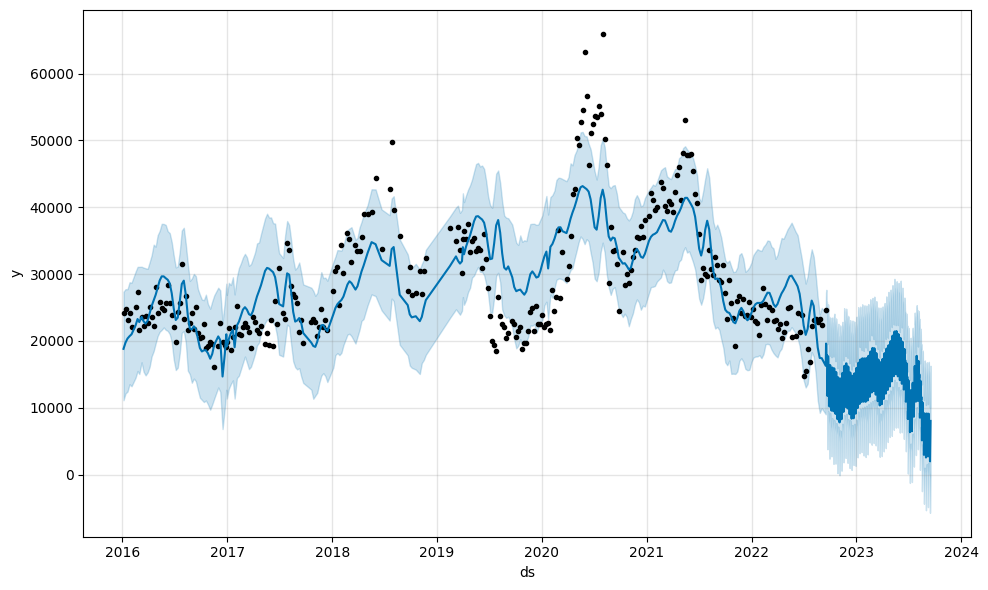

In [8]:
fig1 = model.plot(forecast)